In [ ]:
!rm -rf /content/*
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=1Sqmx8_zqDja9ozkmDt0ojjQ2izNlELg_
!unzip /content/archive.zip
!rm -rf /content/archive.zip
!gdown https://drive.google.com/uc?id=1z_BVURk7ShW9G7DTzUMhy1x3vSzPkkxp
!mkdir sample
!mv /content/predict_score.py /content/sample/.

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating: images/validation/fear/9606.jpg  
  inflating: images/validation/fear/9842.jpg  
  inflating: images/validation/fear/9898.jpg  
  inflating: images/validation/happy/10019.jpg  
  inflati

In [ ]:
import os
train_path = '/content/images/train'
test_path = '/content/images/validation'
n_classes = 0
n_len_training = 0
d = {}
print('Training Files Details :\n')
for i in sorted(os.listdir(train_path)):
    print(f"Class Name = {i}")
    n_classes+=1
    l = len(os.listdir(os.path.join(train_path,i)))
    d[i] = [l]
    n_len_training+=l
    print(f"No of Images = {l}")
    print('='*50)

print(f'\nTotal No of Training Images = {n_len_training}')
print('='*50)
n_len_testing = 0
print('\n\nTest Files Details :\n')
for i in sorted(os.listdir(test_path)):
    print(f"Class Name = {i}")
    l = len(os.listdir(os.path.join(test_path,i)))
    d[i].append(l)
    n_len_testing+=l
    print(f"No of Images = {l}")
    print('='*50)
print(f'\nTotal No of Testing Images = {n_len_testing}')
print('='*50)
print(f'\n\nNo of classes = {n_classes}')

Training Files Details :

Class Name = angry
No of Images = 3993
Class Name = disgust
No of Images = 436
Class Name = fear
No of Images = 4103
Class Name = happy
No of Images = 7164
Class Name = neutral
No of Images = 4982
Class Name = sad
No of Images = 4938
Class Name = surprise
No of Images = 3205

Total No of Training Images = 28821


Test Files Details :

Class Name = angry
No of Images = 960
Class Name = disgust
No of Images = 111
Class Name = fear
No of Images = 1018
Class Name = happy
No of Images = 1825
Class Name = neutral
No of Images = 1216
Class Name = sad
No of Images = 1139
Class Name = surprise
No of Images = 797

Total No of Testing Images = 7066


No of classes = 7


In [ ]:
# !rm -rf /content/data

In [ ]:
import os
os.mkdir('/content/data')

src = '/content/images/train'
dest = '/content/data/.'
os.system(f"mv {src} {dest}")

src = '/content/images/validation'
dest = '/content/data/test'
os.system(f"mv {src} {dest}")

0

In [ ]:
!rm -rf /content/images

In [ ]:
d.keys()

dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

In [ ]:
rem_class = ['neutral']

for i in rem_class:
    full_path = os.path.join('data','train',i)
    os.system(f'rm -rf {full_path}')

for i in rem_class:
    full_path = os.path.join('data','test',i)
    os.system(f'rm -rf {full_path}')

In [ ]:
import os
train_path = '/content/data/train'
test_path = '/content/data/test'
n_classes = 0
n_len_training = 0
d = {}
print('Training Files Details :\n')
for i in sorted(os.listdir(train_path)):
    print(f"Class Name = {i}")
    n_classes+=1
    l = len(os.listdir(os.path.join(train_path,i)))
    d[i] = [l]
    n_len_training+=l
    print(f"No of Images = {l}")
    print('='*50)

print(f'\nTotal No of Training Images = {n_len_training}')
print('='*50)
n_len_testing = 0
print('\n\nTest Files Details :\n')
for i in sorted(os.listdir(test_path)):
    print(f"Class Name = {i}")
    l = len(os.listdir(os.path.join(test_path,i)))
    d[i].append(l)
    n_len_testing+=l
    print(f"No of Images = {l}")
    print('='*50)
print(f'\nTotal No of Testing Images = {n_len_testing}')
print('='*50)
print(f'\n\nNo of classes = {n_classes}')

Training Files Details :

Class Name = angry
No of Images = 3993
Class Name = disgust
No of Images = 436
Class Name = fear
No of Images = 4103
Class Name = happy
No of Images = 7164
Class Name = sad
No of Images = 4938
Class Name = surprise
No of Images = 3205

Total No of Training Images = 23839


Test Files Details :

Class Name = angry
No of Images = 960
Class Name = disgust
No of Images = 111
Class Name = fear
No of Images = 1018
Class Name = happy
No of Images = 1825
Class Name = sad
No of Images = 1139
Class Name = surprise
No of Images = 797

Total No of Testing Images = 5850


No of classes = 6


Training Data Distribution


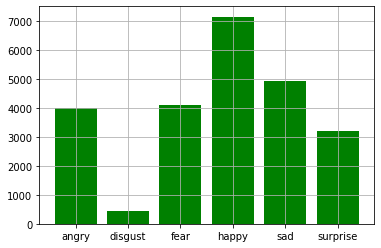

Testing Data Distribution


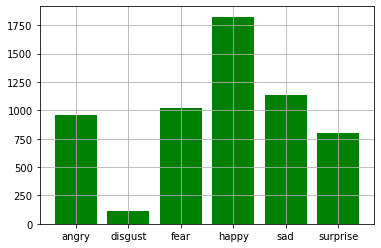

In [ ]:
import matplotlib.pyplot as plt
cls = []
val1 = []
val2 = []
for i,j in d.items():
    cls.append(i)
    val1.append(j[0])
    val2.append(j[1])
data = [(cls,val1)]
data.append((cls,val2))

print(f"Training Data Distribution")
plt.bar(x = data[0][0],height= data[0][1],color='green')
plt.grid()
plt.show()
print('='*70)
print(f"Testing Data Distribution")
plt.bar(x = data[1][0],height= data[1][1],color='green')
plt.grid()
plt.show()

In [ ]:
import numpy as np
d = {}
n_images = 5

for i in os.listdir(train_path):
    l = os.listdir(os.path.join(train_path,i))
    if len(l)>n_images:
        l = np.random.choice(l, n_images, replace=False).tolist()
    d[i] = list(map(lambda x:os.path.join(train_path,i,x),l))


Sample images of class :  angry


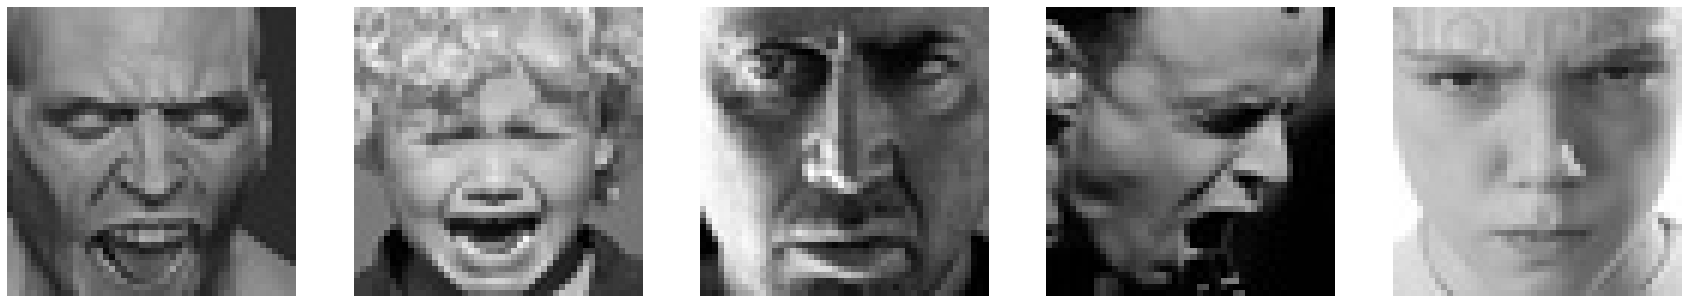


Sample images of class :  surprise


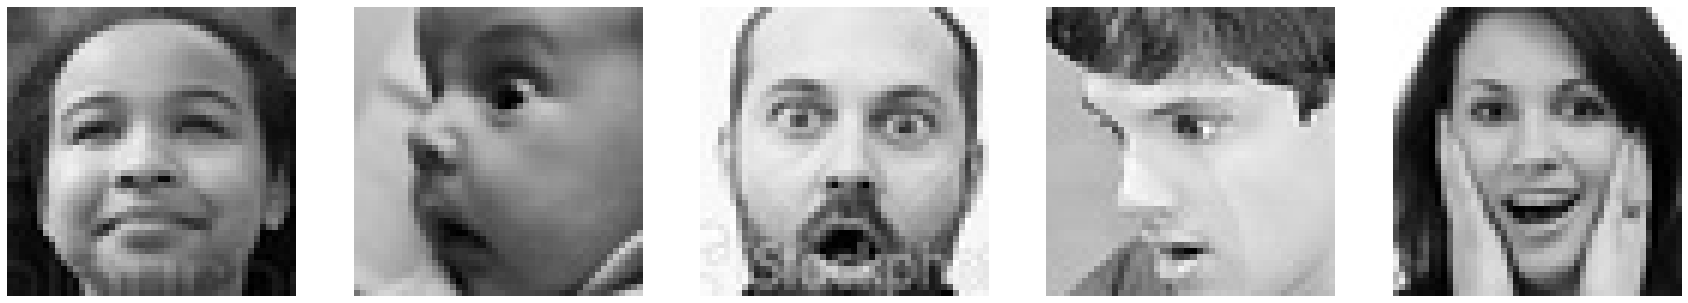


Sample images of class :  disgust


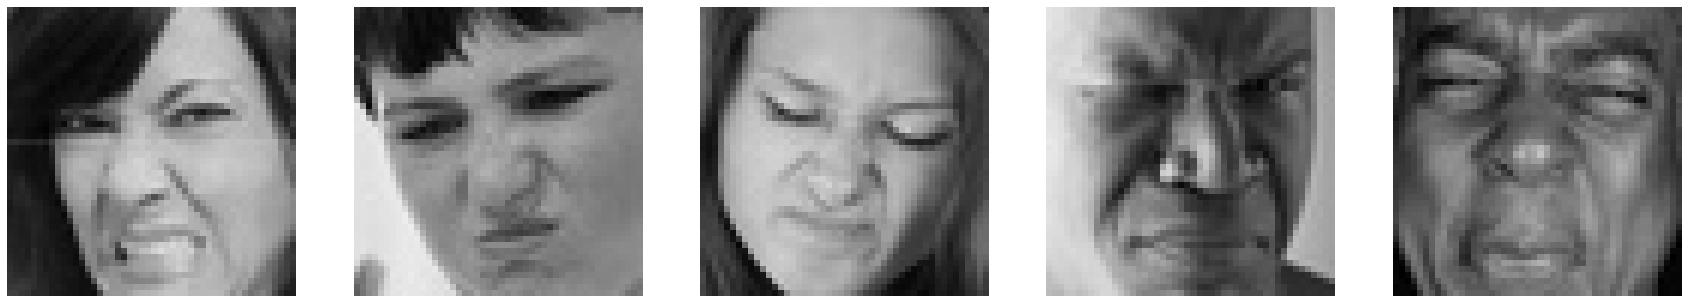


Sample images of class :  happy


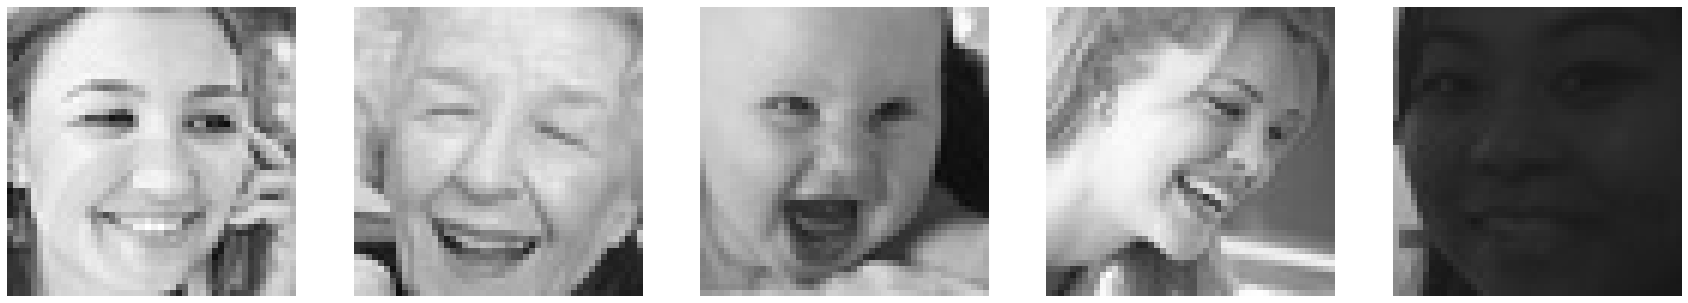


Sample images of class :  fear


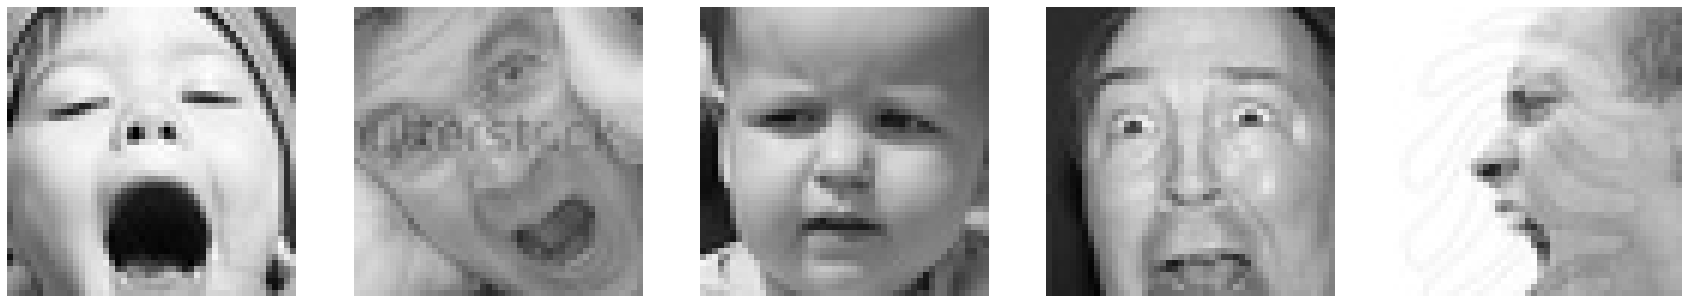


Sample images of class :  sad


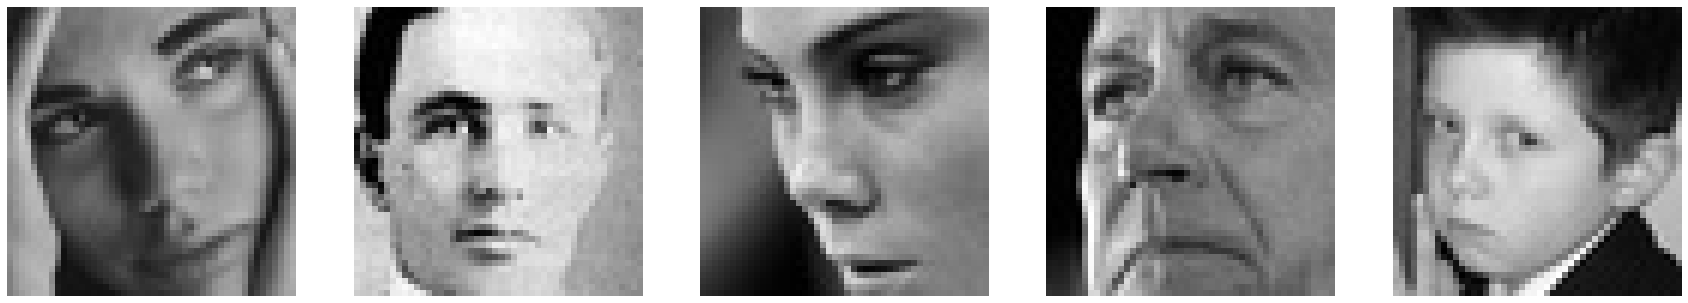

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
for i in list(d.keys()):
    print('\nSample images of class : ',i)
    images = d[i]
    plt.figure(figsize=(30,8))
    for j in range(len(images)):
        img = mpimg.imread(images[j])
        plt.subplot(1, n_images, j+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        plt.axis("off")
    plt.show()

**CNN**

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import tensorflow as tf
import scikitplot as skplt
from sample import predict_score
from sklearn.metrics import classification_report,balanced_accuracy_score
print(tf.__version__)

2.11.0


In [ ]:
i = tf.keras.layers.Input(shape = (150, 150, 1))
x = tf.keras.layers.Conv2D(16, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_1') (i)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_1') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_1') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_1') (x)


x = tf.keras.layers.Conv2D(32, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_2') (x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_2') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_2') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_2') (x)


# x = tf.keras.layers.Conv2D(64, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_3') (x)
# x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_3') (x) #AveragePooling2D
# # x = tf.keras.layers.Dropout(0.4, name='dropout_3') (x)
# x = tf.keras.layers.BatchNormalization(name='Batchnorm_3') (x)


x = tf.keras.layers.Conv2D(128, (3,3), strides=(1, 1), padding='same', activation = tf.nn.relu, name='conv2d_4') (x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=None, padding="valid", name='maxpool2d_4') (x) #AveragePooling2D
# x = tf.keras.layers.Dropout(0.4, name='dropout_4') (x)
x = tf.keras.layers.BatchNormalization(name='Batchnorm_4') (x)

x = tf.keras.layers.Flatten(name='flatten') (x)
x = tf.keras.layers.Dense(512, activation=tf.nn.relu, name='dense_1') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_1') (x)

x = tf.keras.layers.Dense(256, activation=tf.nn.relu, name='dense_2') (x)
x = tf.keras.layers.Dropout(0.5, name='dropout_dense_2') (x)

x = tf.keras.layers.Dense(6, activation = tf.nn.softmax, name='output_layer') (x)

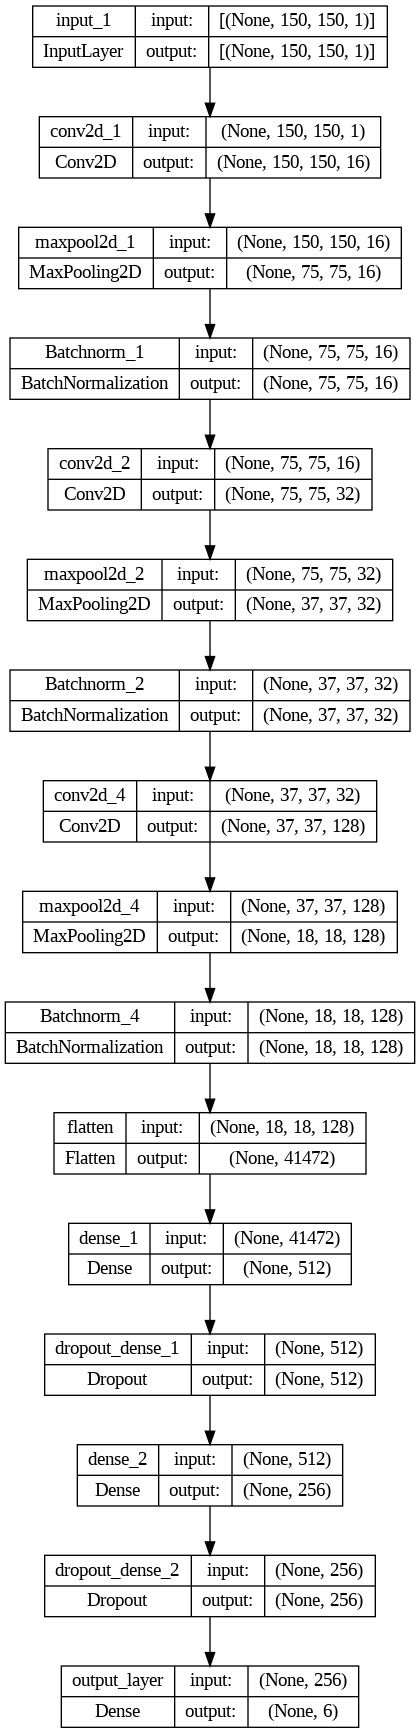

In [ ]:
model = tf.keras.models.Model(inputs = i, outputs = x)
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      160       
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 75, 75, 16)        0         
                                                                 
 Batchnorm_1 (BatchNormaliza  (None, 75, 75, 16)       64        
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 maxpool2d_2 (MaxPooling2D)  (None, 37, 37, 32)        0         
                                                             

In [ ]:
from sklearn.metrics import confusion_matrix,balanced_accuracy_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()
  y_true = np.argmax(y_true,axis=-1)
  y_pred = np.argmax(y_pred,axis=-1)

  y_true = y_true.ravel().astype('int32')
  y_pred = y_pred.ravel().astype('int32')
  return balanced_accuracy_score(y_true,y_pred)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.categorical_crossentropy, #tf.keras.losses.binary_crossentropy
              metrics = predict_score.accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0, rotation_range = 20, 
                                                                width_shift_range=0.2, height_shift_range=0.2, 
                                                                shear_range=0.2, zoom_range=0.2, horizontal_flip=True, 
                                                                vertical_flip=False, fill_mode="nearest")

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )

In [ ]:
train_dir = '/content/data/train'
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=64,
        class_mode='categorical', 
        shuffle = True ,
        color_mode="grayscale") 

y_train = train_generator.classes

test_dir = '/content/data/test'
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical',
        shuffle = True ,
        color_mode="grayscale")

Found 23839 images belonging to 6 classes.
Found 5850 images belonging to 6 classes.


In [ ]:
from collections import Counter
counter = Counter(train_generator.classes)                       
max_val = float(max(counter.values()))   
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
class_weights

{0: 1.7941397445529677,
 1: 16.431192660550458,
 2: 1.7460394833048989,
 3: 1.0,
 4: 1.4507897934386391,
 5: 2.235257410296412}

In [ ]:
batch_size = 64
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 64
validation_steps = n_len_testing // validation_batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=2,
    mode='max', baseline=None, restore_best_weights=True
)

In [ ]:
print('Results for CNN Classifier:-\n')
start_time = time.time()

result = model.fit(train_generator, 
                   validation_data = validation_generator, 
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   callbacks=[callback],
                   epochs = 4)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for CNN Classifier:-

Epoch 1/4
372/372 [==============================] - 74s 199ms/step - loss: 22.8953 - accuracy: 0.9252 - val_loss: 12.5764 - val_accuracy: 0.9253
Epoch 2/4
372/372 [==============================] - 74s 198ms/step - loss: 22.6995 - accuracy: 0.9259 - val_loss: 12.4132 - val_accuracy: 0.9246
Epoch 3/4
372/372 [==============================] - 73s 197ms/step - loss: 22.7829 - accuracy: 0.9255 - val_loss: 12.4633 - val_accuracy: 0.9236

Training time(sec) =  229.54193758964539


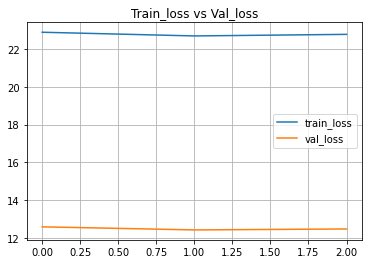

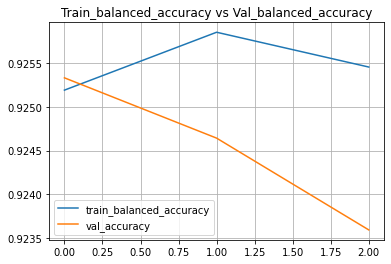

In [ ]:
plt.plot(result.history['loss'] , label = 'train_loss')
plt.plot(result.history['val_loss'] , label = 'val_loss')
plt.title('Train_loss vs Val_loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(result.history['accuracy'] , label = 'train_balanced_accuracy')
plt.plot(result.history['val_accuracy'] , label = 'val_accuracy')
plt.title('Train_balanced_accuracy vs Val_balanced_accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255.0, rotation_range = 40, 
                                   width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, 
                                   vertical_flip=True, fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=32,
        class_mode='categorical', #'binary'
        shuffle = False ,
        color_mode="grayscale" ) #'grayscale'

batch_size = 32
y_train = train_generator.classes

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255.0)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical', #'binary'
        shuffle = False ,
        color_mode="grayscale" ) #'grayscale'

test_batch_size = 32
y_test = test_generator.classes

Found 23839 images belonging to 6 classes.
Found 5850 images belonging to 6 classes.


In [ ]:
start_time = time.time()
y_pred1= model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

745/745 [==============================] - 58s 77ms/step

Total time(sec) =  58.1611168384552


In [ ]:
label_map = (train_generator.class_indices)
labels = list(label_map.keys())
labels

['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']

183/183 [==============================] - 5s 28ms/step
Prediction time(sec) =  5.258105516433716


Training score =  0.8488002949307073
Tesing score =  0.8475669461430768


No of missclassified for class angry (test data) = 155 
No of missclassified for class disgust (test data) = 16 
No of missclassified for class fear (test data) = 163 
No of missclassified for class happy (test data) = 286 
No of missclassified for class sad (test data) = 167 
No of missclassified for class surprise (test data) = 116 
Total no of missclassified points(test data) =  903
Total % of missclassified points(test data) =  0.15435897435897436


{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5}


Confusion matrix:


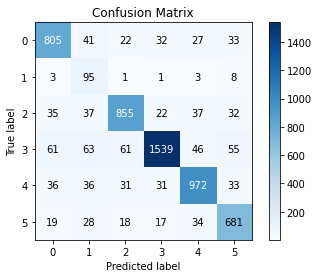



Classification report:-

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       960
           1       0.32      0.86      0.46       111
           2       0.87      0.84      0.85      1018
           3       0.94      0.84      0.89      1825
           4       0.87      0.85      0.86      1139
           5       0.81      0.85      0.83       797

    accuracy                           0.85      5850
   macro avg       0.77      0.85      0.79      5850
weighted avg       0.87      0.85      0.85      5850

**************************************************************************


In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

start_time = time.time()
y_pred = model.predict(test_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
y_pred1 = predict_score.predict_score(y_pred1,y_train,0.2)
y_pred = predict_score.predict_score(y_pred,y_test,0.2)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))

print('\n')
print((test_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

CNN = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

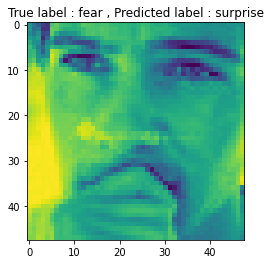

In [ ]:
files = []
for filepath in test_generator.filepaths:
  files.append(filepath)

missclassified_idx = np.where(y_test != y_pred)[0] 
i = np.random.choice(missclassified_idx)
img = mpimg.imread(files[i])
plt.imshow(img)
plt.title('True label : {} , Predicted label : {}'.format(labels[y_test[i]], labels[y_pred[i]]))
plt.show()

In [ ]:
!rm -rf /content/model

In [ ]:
os.mkdir('/content/model')
model.save('/content/model')

In [ ]:
!zip -r model.zip /content/model/

  adding: content/model/ (stored 0%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/model/variables/variables.index (deflated 70%)
  adding: content/model/saved_model.pb (deflated 89%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/keras_metadata.pb (deflated 93%)


**Prediction**

In [ ]:
label = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5}
label = {k:v for v,k in label.items()}
label

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise'}

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np

model_path = '/content/model'

def balanced_accuracy(y_true, y_pred):
    y_true = y_true.numpy()
    y_pred = y_pred.numpy()
    y_true = np.argmax(y_true,axis=-1)
    y_pred = np.argmax(y_pred,axis=-1)

    y_true = y_true.ravel().astype('int32')
    y_pred = y_pred.ravel().astype('int32')
    return balanced_accuracy_score(y_true,y_pred)

model = tf.keras.models.load_model(model_path,custom_objects = {'balanced_accuracy' : balanced_accuracy})

Saving 10435.jpg to 10435 (3).jpg
1/1 [==============================] - 0s 35ms/step





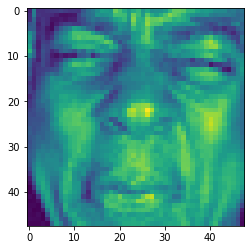

Predicted Class :  fear


In [ ]:
import numpy as np
from google.colab import files
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
    path = fn
    img = tf.keras.preprocessing.image.load_img(path, target_size=(150, 150), color_mode='grayscale' )
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    cls = model.predict(images)
    cls = np.argmax(cls, axis=1)

    print('\n\n')
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.show()
    print('Predicted Class : ',label[int(cls[0])])